### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [77]:
data = pd.read_csv('C:/Users/lubna/OneDrive/Desktop/kraftwerk/Project1/coupons.csv')

In [78]:
data.head()
data.dtypes

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object

2. Investigate the dataset for missing or problematic data.

In [79]:
# Identify columns with any null values
null_columns = data.columns[data.isnull().any()].tolist()

# Count null values per column
null_counts = data.isnull().sum()

# Filter only columns that have nulls
null_counts = null_counts[null_counts > 0]

print("Columns with null values:", null_columns)
print("\nNull value counts per column:")
print(null_counts)

Columns with null values: ['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

Null value counts per column:
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [80]:
data["car"].str.replace(" ","NoCar")

data = data.dropna(subset=['Bar','CoffeeHouse','CarryAway','RestaurantLessThan20','Restaurant20To50'])

data.head()
data.size
data.shape


(12079, 26)

4. What proportion of the total observations chose to accept the coupon?



In [81]:
count_y_equals_1 = data[data["Y"] == 1].shape[0]
accepted_coupon = (count_y_equals_1 / 12079) * 100
print(f"Total number of rows where Y = 1: {count_y_equals_1}")
print(f"Accepted Proportion where Y = 1: is {accepted_coupon}")

Total number of rows where Y = 1: 6877
Accepted Proportion where Y = 1: is 56.93352098683666


5. Use a bar plot to visualize the `coupon` column.

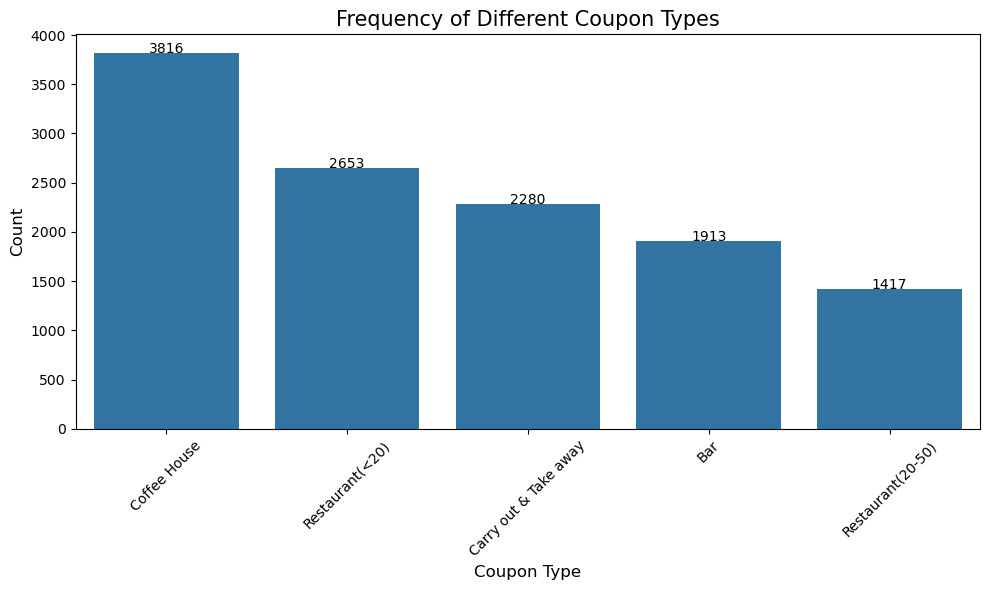

In [82]:
# Count the frequency of each coupon type
coupon_counts = data['coupon'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=coupon_counts.index, y=coupon_counts.values)

# Add labels and title
plt.title('Frequency of Different Coupon Types', fontsize=15)
plt.xlabel('Coupon Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-labels for better readability

# Add count labels on top of each bar
for i, count in enumerate(coupon_counts.values):
    plt.text(i, count + 0.1, str(count), ha='center')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


6. Use a histogram to visualize the temperature column.

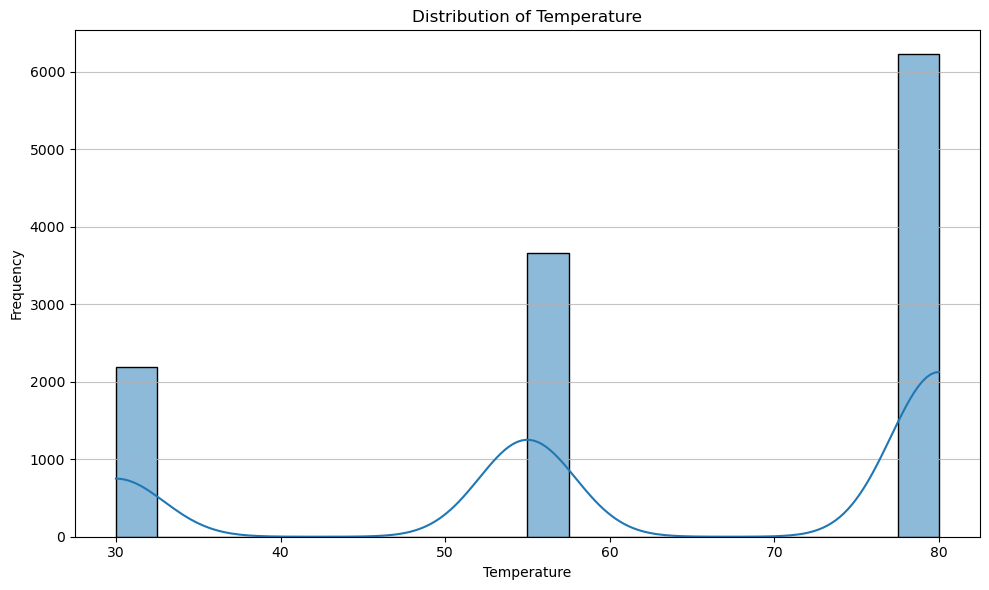

In [83]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create a histogram using seaborn (for better aesthetics)
sns.histplot(data=data, x='temperature', kde=True, bins=20)

# Add labels and title
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature')

# Add grid for better readability
plt.grid(axis='y', alpha=0.75)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Alternative using matplotlib only:
# plt.hist(data['temperature'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [84]:
dfBarCoupon = data[data['coupon'] == 'Bar']
dfBarCoupon.dtypes
dfBarCoupon.shape

(1913, 26)

2. What proportion of bar coupons were accepted?


In [85]:
count_y_equals_1_bar = dfBarCoupon[dfBarCoupon["Y"] == 1].shape[0]
accepted_coupon_bar = (count_y_equals_1_bar / 1913) * 100
print(f"Total number of rows where Y = 1 for Bar coupon: {count_y_equals_1_bar}")
print(f"Accepted Proportion of Bar coupon where Y = 1: is {accepted_coupon_bar}")

Total number of rows where Y = 1 for Bar coupon: 788
Accepted Proportion of Bar coupon where Y = 1: is 41.19184526921067


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [86]:
# Display basic information about the Bar column
print("Bar column data type:", data["Bar"].dtype)
print("Number of rows in Bar column:", len(data["Bar"]))
print("Number of non-null values:", data["Bar"].count())
print("Number of null values:", data["Bar"].isna().sum())

# Show the first 20 values
print("\nFirst 20 values in Bar column:")
print(data["Bar"].head(20))

# Show some random samples from the column
print("\n10 random samples from Bar column:")
print(data["Bar"].sample(10))

# If the column has any non-null values, show their distribution
if data["Bar"].count() > 0:
    print("\nDistribution of values in Bar column:")
    print(data["Bar"].value_counts().sort_index())
    
    print("\nUnique values in Bar column:")
    print(sorted(data["Bar"].dropna().unique()))
else:
    print("\nThe Bar column contains only null values.")

#create the 2 groups
low_bar = ['never', 'less1', '1~3']
high_bar = ['4~8', 'gt8']


#prep
data['bar_freq_group'] = data['Bar'].apply(
    lambda x: '≤3 times/month' if x in low_bar
    else '>3 times/month' if x in high_bar
    else None
)

bar_comp = data.dropna(subset=['bar_freq_group'])

#compute acceptance rates
acceptance_rates = (
    bar_comp
    .groupby('bar_freq_group')['Y']
    .mean()
)

acceptance_rates


bar_stats = (
    bar_comp
    .groupby('bar_freq_group')['Y']
    .agg(Acceptance_Rate='mean', Count='count')
    .reset_index()
)

bar_stats

#Just a quick output is fine


Bar column data type: object
Number of rows in Bar column: 12079
Number of non-null values: 12079
Number of null values: 0

First 20 values in Bar column:
22    never
23    never
24    never
25    never
26    never
27    never
28    never
29    never
30    never
31    never
32    never
33    never
34    never
35    never
36    never
37    never
38    never
39    never
40    never
41    never
Name: Bar, dtype: object

10 random samples from Bar column:
11726      gt8
4266       1~3
11941    less1
7883       1~3
2044     less1
11000    less1
9314     never
8343     never
9094     less1
4048     never
Name: Bar, dtype: object

Distribution of values in Bar column:
Bar
1~3      2370
4~8      1054
gt8       327
less1    3394
never    4934
Name: count, dtype: int64

Unique values in Bar column:
['1~3', '4~8', 'gt8', 'less1', 'never']


,bar_freq_group,Acceptance_Rate,Count
0,>3 times/month,0.621289,1381
1,≤3 times/month,0.562629,10698


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


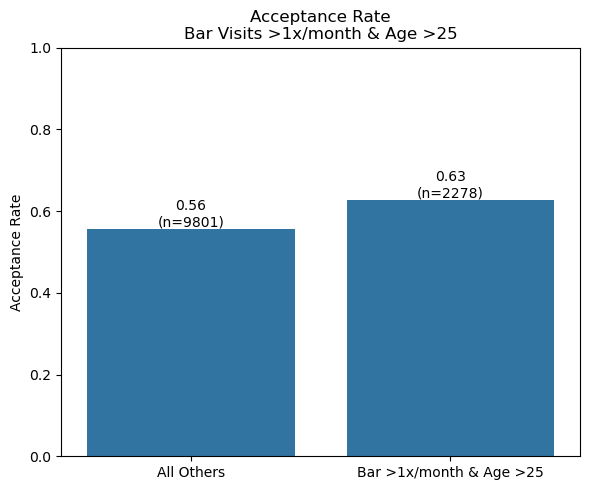

In [87]:
# Define bar-frequency buckets
more_than_once = ['1~3', '4~8', 'gt8']
data['age'] = pd.to_numeric(data['age'], errors='coerce')
data['bar_often_over25'] = (
    data['Bar'].isin(more_than_once) &
    (data['age'] > 25)
)

data.groupby('bar_often_over25')['Y'].mean().rename({
    True: 'Bar >1x/month & Age >25',
    False: 'All Others'
})

#compute rates
bar_age_stats = (
    data
    .groupby('bar_often_over25')['Y']
    .agg(Acceptance_Rate='mean', Count='count')
    .rename(index={
        True: 'Bar >1x/month & Age >25',
        False: 'All Others'
    })
    .reset_index()
)

bar_age_stats

#plot
plt.figure(figsize=(6, 5))

ax = sns.barplot(
    data=bar_age_stats,
    x='bar_often_over25',
    y='Acceptance_Rate'
)

ax.set_title('Acceptance Rate\nBar Visits >1x/month & Age >25')
ax.set_xlabel('')
ax.set_ylabel('Acceptance Rate')
ax.set_ylim(0, 1)

#annotate
for i, row in bar_age_stats.iterrows():
    ax.text(
        i,
        row['Acceptance_Rate'],
        f"{row['Acceptance_Rate']:.2f}\n(n={int(row['Count'])})",
        ha='center',
        va='bottom'
    )

plt.tight_layout()
plt.show()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [88]:
# Bar frequency > once per month
more_than_once = ['1~3', '4~8', 'gt8']

# Occupations to exclude
excluded_jobs = ['Farming Fishing & Forestry']

data['target_group'] = (
    data['Bar'].isin(more_than_once) &
    (data['passanger'] != 'Kid') &
    (~data['occupation'].isin(excluded_jobs))
)

acceptance_rates = (
    data.groupby('target_group')['Y']
    .mean()
    .rename({
        True: 'Bar >1x/month, No Kid Passenger, Non-FFF Occupation',
        False: 'All Others'
    })
)

acceptance_rates


target_group
All Others                                             0.544909
Bar >1x/month, No Kid Passenger, Non-FFF Occupation    0.623567
Name: Y, dtype: float64

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



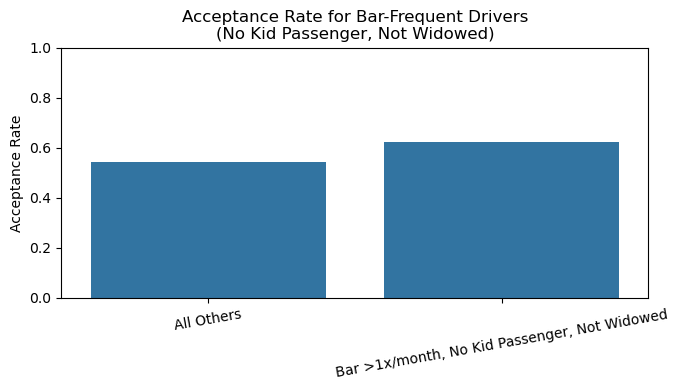

In [89]:
#go to bars more than once a month, had passengers that were not a kid, and were not widowed

#define condition
bar_more_than_once = ['1~3', '4~8', 'gt8']

data['bar_notkid_notwidowed'] = (
    data['Bar'].isin(bar_more_than_once) &
    (data['passanger'] != 'Kid') &
    (data['maritalStatus'] != 'Widowed')
)

#calc accpetance rates
rates = (
    data.groupby('bar_notkid_notwidowed')['Y']
      .mean()
      .reset_index()
)

rates['Group'] = rates['bar_notkid_notwidowed'].map({
    True: 'Bar >1x/month, No Kid Passenger, Not Widowed',
    False: 'All Others'
})

#plot
plt.figure(figsize=(7,4))
sns.barplot(
    data=rates,
    x='Group',
    y='Y',
    errorbar=None
)

plt.title('Acceptance Rate for Bar-Frequent Drivers\n(No Kid Passenger, Not Widowed)')
plt.xlabel('')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.xticks(rotation=10)
plt.tight_layout()
plt.show()


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [91]:
print("Males who are singles accepted more coupons")

Males who are singles accepted more coupons


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  